In [4]:
import os
os.listdir("/content")

['.config',
 'Kemiskinan_2015.csv',
 'Kemiskinan_2020.csv',
 'Kemiskinan_2017.csv',
 'Kemiskinan_2024.csv',
 'Kemiskinan_2022.csv',
 'Kemiskinan_2019.csv',
 'Kemiskinan_2021.csv',
 'Kemiskinan_2018.csv',
 'Kemiskinan_2023.csv',
 'Kemiskinan_2016.csv',
 '.ipynb_checkpoints',
 'sample_data']

In [20]:
import glob
import os
import pandas as pd

all_files = glob.glob("/content/Kemiskinan_*.csv")
dfs = []

for file in all_files:
    filename = os.path.basename(file)

    tahun = int(filename.replace("Kemiskinan_", "").replace(".csv", ""))

    temp = pd.read_csv(file)

    temp = temp[[
        "Provinsi",
        "Jumlah Penduduk Miskin - Maret (ribu) (Ribu)",
        "Persentase Penduduk Miskin - Maret"
    ]]

    temp.columns = [
        "Provinsi",
        "Jumlah Kemiskinan",
        "Persentase Kemiskinan"
    ]

    temp["Tahun"] = tahun
    dfs.append(temp)

data_kemiskinan = pd.concat(dfs, ignore_index=True)


**DATA CLEANING**

In [21]:
data_kemiskinan.shape

(368, 4)

In [22]:
data_kemiskinan.sample(10)

,Provinsi,Jumlah Kemiskinan,Persentase Kemiskinan,Tahun
10,DKI Jakarta,398.92,3.93,2015
306,Banten,826.13,6.17,2023
102,Papua Barat,228.38,25.1,2017
240,Kalimantan Barat,367.89,7.15,2021
302,Jawa Barat,3888.6,7.62,2023
26,Sulawesi Selatan,797.72,9.39,2015
234,DI Yogyakarta,506.45,12.8,2021
127,Kalimantan Timur,221.34,5.78,2024
184,Catatan,NaN,NaN,2022
256,Aceh,839.49,15.97,2018


In [23]:
data_kemiskinan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Provinsi               366 non-null    object
 1   Jumlah Kemiskinan      362 non-null    object
 2   Persentase Kemiskinan  362 non-null    object
 3   Tahun                  368 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 11.6+ KB


In [24]:
data_kemiskinan.isna().sum()

,0
Provinsi,2
Jumlah Kemiskinan,6
Persentase Kemiskinan,6
Tahun,0


In [25]:
data_kemiskinan["Provinsi"].unique()

array(['Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Jambi',
       'Sumatera Selatan', 'Bengkulu', 'Lampung',
       'Kepulauan Bangka Belitung', 'Kepulauan Riau', 'DKI Jakarta',
       'Jawa Barat', 'Jawa Tengah', 'DI Yogyakarta', 'Jawa Timur',
       'Banten', 'Bali', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur',
       'Kalimantan Barat', 'Kalimantan Tengah', 'Kalimantan Selatan',
       'Kalimantan Timur', 'Kalimantan Utara', 'Sulawesi Utara',
       'Sulawesi Tengah', 'Sulawesi Selatan', 'Sulawesi Tenggara',
       'Gorontalo', 'Sulawesi Barat', 'Maluku', 'Maluku Utara',
       'Papua Barat', 'Papua', 'Indonesia', 'Papua Barat Daya',
       'Papua Selatan', 'Papua Tengah', 'Papua Pegunungan', nan,
       'Catatan', '-',
       'September 2023 tidak dilakukan penghitungan kemiskinan'],
      dtype=object)

In [26]:
data_kemiskinan.duplicated().sum()

np.int64(0)

*Ringkasan Kondisi Data*

Terdapat beberapa cacat data pada data_kemiskinan. Tedeteksi bahwa data ini terdapat kecacatan seperti:

1. Salah tipe data pada kolom 'Jumlah Kemiskinan' & 'Persentase Kemiskinan'
2. Terdapat missing values pada kolom 'Provinsi', 'Jumlah Kemiskinan' dan 'Persentase Kemiskinan'
3. Terdapat baris sampah di kolom 'Provinsi'

**FIX DATA**

In [27]:
data_kemiskinan = data_kemiskinan.dropna(subset=["Provinsi"])
data_kemiskinan = data_kemiskinan[
    ~data_kemiskinan["Provinsi"].str.contains(
        "Catatan|tidak dilakukan|-",
        case=False,
        na=False
    )
]

data_kemiskinan.shape

(362, 4)

In [39]:
data_kemiskinan['Provinsi'].unique()

array(['Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Jambi',
       'Sumatera Selatan', 'Bengkulu', 'Lampung',
       'Kepulauan Bangka Belitung', 'Kepulauan Riau', 'DKI Jakarta',
       'Jawa Barat', 'Jawa Tengah', 'DI Yogyakarta', 'Jawa Timur',
       'Banten', 'Bali', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur',
       'Kalimantan Barat', 'Kalimantan Tengah', 'Kalimantan Selatan',
       'Kalimantan Timur', 'Kalimantan Utara', 'Sulawesi Utara',
       'Sulawesi Tengah', 'Sulawesi Selatan', 'Sulawesi Tenggara',
       'Gorontalo', 'Sulawesi Barat', 'Maluku', 'Maluku Utara',
       'Papua Barat', 'Papua', 'Indonesia', 'Papua Barat Daya',
       'Papua Selatan', 'Papua Tengah', 'Papua Pegunungan'], dtype=object)

In [28]:
kolom_numerik = ["Jumlah Kemiskinan","Persentase Kemiskinan"]

for a in kolom_numerik:
  data_kemiskinan[a] = pd.to_numeric(data_kemiskinan[a],errors="coerce")


data_kemiskinan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 362 entries, 0 to 367
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Provinsi               362 non-null    object 
 1   Jumlah Kemiskinan      354 non-null    float64
 2   Persentase Kemiskinan  354 non-null    float64
 3   Tahun                  362 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 14.1+ KB


In [31]:
data_kemiskinan["Jumlah Kemiskinan"] = (
    data_kemiskinan.groupby("Provinsi")["Jumlah Kemiskinan"].
    transform(lambda x: x.fillna(x.median()))

)

data_kemiskinan['Persentase Kemiskinan'] = (
    data_kemiskinan.groupby("Provinsi")["Persentase Kemiskinan"].
    transform(lambda x: x.fillna(x.median()))
)

In [34]:
data_kemiskinan.isna().sum()

,0
Provinsi,0
Jumlah Kemiskinan,0
Persentase Kemiskinan,0
Tahun,0


**EDA (Exploratory Data Analysis)**


**1. Quality Data**

In [40]:
data_kemiskinan.describe()

,Jumlah Kemiskinan,Persentase Kemiskinan,Tahun
count,362.000000,362.000000,362.000000
mean,1478.332099,82.038508,2019.616022
std,4390.319111,1348.853845,2.900772
min,39.690000,3.470000,2015.000000
25%,193.427500,6.427500,2017.000000
50%,365.440000,9.660000,2020.000000
75%,857.260000,14.245000,2022.000000
max,28592.830000,25674.580000,2024.000000


**2. Jumlah Provinsi Per Tahun**

In [41]:
data_kemiskinan.groupby("Tahun")["Provinsi"].nunique()

,Provinsi
Tahun,
2015,35
2016,35
2017,35
2018,35
2019,35
2020,35
2021,35
2022,39
2023,39


**3. Tren Nasional Kemiskinan Dari Tahun ke Tahun**

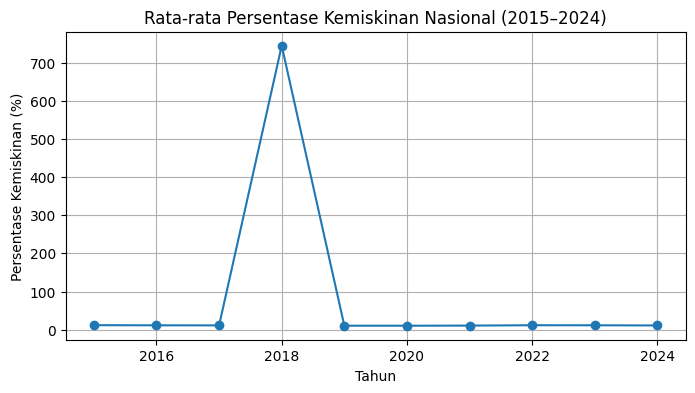

In [42]:
import matplotlib.pyplot as plt

nasional = (
    data_kemiskinan.groupby("Tahun")["Persentase Kemiskinan"].mean()
)

plt.figure(figsize=(8,4))
plt.plot(nasional.index, nasional.values, marker="o")
plt.title("Rata-rata Persentase Kemiskinan Nasional (2015–2024)")
plt.xlabel("Tahun")
plt.ylabel("Persentase Kemiskinan (%)")
plt.grid(True)
plt.show()


**5. Provinsi Paling Miskin vs Provinsi Paling Rendah**

In [45]:
Termiskin = (
    data_kemiskinan.groupby("Provinsi")["Persentase Kemiskinan"].mean().
    sort_values(ascending=False).head(5)
)
Termiskin

,Persentase Kemiskinan
Provinsi,
Indonesia,2576.404
Papua Pegunungan,32.970
Papua Tengah,29.760
Papua,26.295
Papua Barat,22.822


In [46]:
Terendah = (
    data_kemiskinan.groupby("Provinsi")["Persentase Kemiskinan"].mean().
    sort_values().head(5)
)

Terendah

,Persentase Kemiskinan
Provinsi,
DKI Jakarta,4.117
Bali,4.217
Kalimantan Selatan,4.576
Kepulauan Bangka Belitung,4.864
Kalimantan Tengah,5.266


**6. Distribusi Kemiskinan(Skew left/Right)**

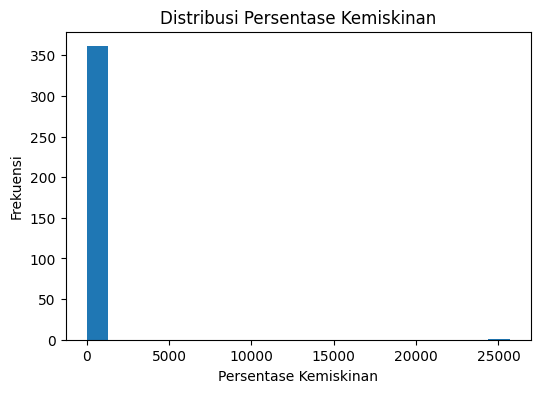

In [47]:
plt.figure(figsize=(6,4))
plt.hist(data_kemiskinan["Persentase Kemiskinan"], bins=20)
plt.title("Distribusi Persentase Kemiskinan")
plt.xlabel("Persentase Kemiskinan")
plt.ylabel("Frekuensi")
plt.show()


**7. Variasi Antar Provinsi**

<Figure size 1200x500 with 0 Axes>

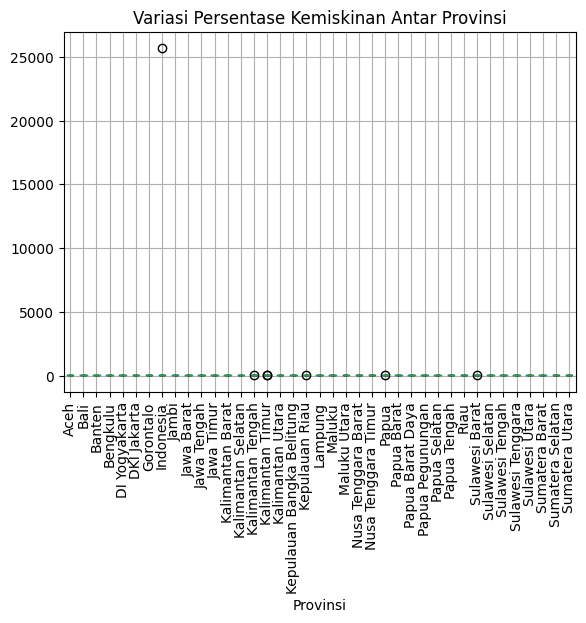

In [48]:
plt.figure(figsize=(12,5))
data_kemiskinan.boxplot(
    column="Persentase Kemiskinan",
    by="Provinsi",
    rot=90
)
plt.title("Variasi Persentase Kemiskinan Antar Provinsi")
plt.suptitle("")
plt.show()


Secara struktural data sudah rapi, tapi EDA menemukan dua masalah utama yaitu:
1. Skala kolom persentase kemiskinan tidak benar
2. Keberadaan baris agregat nasional Indonesia yang harus dihapus

Kedua masalah ini harus diperbaiki sebelum analisis selanjut nya dilakukan

**FIX THAT**

In [50]:
data_kemiskinan = data_kemiskinan[
    data_kemiskinan["Provinsi"] != "Indonesia"
]

In [51]:
data_kemiskinan["Persentase Kemiskinan"].describe()

,Persentase Kemiskinan
count,352.000000
mean,11.175852
std,6.149852
min,3.470000
25%,6.327500
50%,9.465000
75%,14.305000
max,32.970000


In [53]:
data_kemiskinan["Persentase Kemiskinan"]\
.sort_values(ascending=False).head(10)


,Persentase Kemiskinan
328,32.97
142,32.97
181,32.97
141,29.76
180,29.76
327,29.76
366,28.54
33,28.17
289,27.74
103,27.62


In [54]:
data_kemiskinan["Persentase Kemiskinan"] = (
    data_kemiskinan["Persentase Kemiskinan"] / 100
)


In [55]:
data_kemiskinan["Persentase Kemiskinan"].describe()


,Persentase Kemiskinan
count,352.000000
mean,0.111759
std,0.061499
min,0.034700
25%,0.063275
50%,0.094650
75%,0.143050
max,0.329700


In [57]:
data_kemiskinan[
    (data_kemiskinan["Persentase Kemiskinan"] < 0) |
    (data_kemiskinan["Persentase Kemiskinan"] > 100)
]


,Provinsi,Jumlah Kemiskinan,Persentase Kemiskinan,Tahun


In [58]:
data_kemiskinan.groupby("Tahun")["Provinsi"].nunique()


,Provinsi
Tahun,
2015,34
2016,34
2017,34
2018,34
2019,34
2020,34
2021,34
2022,38
2023,38


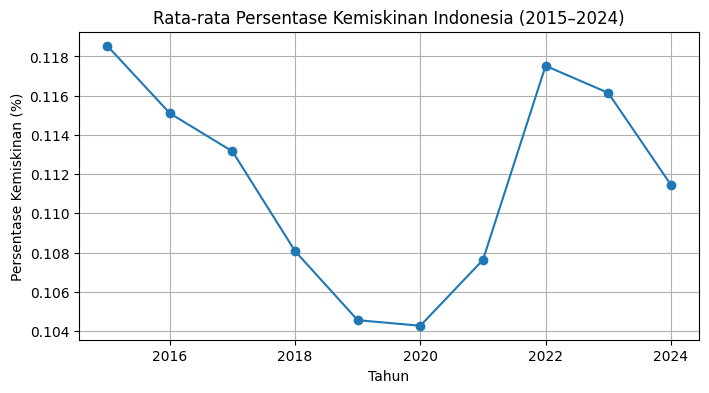

In [61]:
nasional = data_kemiskinan.groupby("Tahun")["Persentase Kemiskinan"].mean()

plt.figure(figsize=(8,4))
plt.plot(nasional.index, nasional.values, marker="o")
plt.title("Rata-rata Persentase Kemiskinan Indonesia (2015–2024)")
plt.xlabel("Tahun")
plt.ylabel("Persentase Kemiskinan (%)")
plt.grid(True)
plt.show()


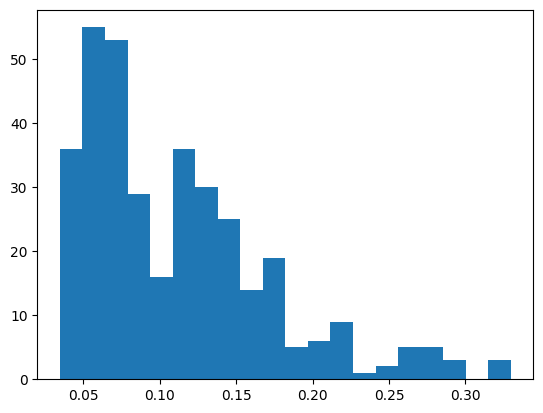

In [60]:
plt.hist(data_kemiskinan["Persentase Kemiskinan"], bins=20)
plt.show()


**KESIMPULAN**

Berdasarkan hasil Exploratory Data Analysis (EDA), data kemiskinan Indonesia dari tahun 2015 - 2024 telah dilakukan data cleaning dan validasi. Baris ("Indonesia") yang bukan provinsi telah dihapus dan skala variabel Persentase Kemiskinan telah diubah.

Hasil validasi menunjukan sudah tidak terdapat nilai persentase kemiskinan di luar rentang logis (0 - 100). Distribusi data menunjukan pola skew ke kanan, dengan mayoritas provinsi berada di kisaran 5 - 15 % . Tren rata rata Indonesia juga menunjukan penurunan kemiskinan hingga 2019, peningkatan pada periode pandemi COVID-19(2020 - 2022), dan kembali menurun pada tahun tahun berikutnya.

Perbedaan jumlah provinsi setelah tahun 2022 disebabkan oleh pemekaran wilayah di Provinsi Papua dan bukan merupakan kesalahan da